# Introduction: Business Problem

Survey Master, a company specializing in market survey has been assigned by West Mall to conduct analysis of its customer. Such analysis will be useful to determine the next directions of the mall. Its primary assignment is to segment the customers and come up with advice which segment of customers the West Mall has to concentrate.

## Data

Data in this study is taken from an online example. The data itself consists of Customer ID, Gender, Age, Annual Income and Spending Score.

Spending of customers are very much influenced by factors such as:
1. Gender
2. Age
3. Annual Income

We will look at in analysis how these factors are interlinked one another.

In [90]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline    

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder 

Read data set

In [91]:
df_customer_data=pd.read_csv('C:/Users/richard.siburian/Downloads/mall_customer_data.csv')
df_customer_data = df_customer_data.rename({'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, axis=1)
df_customer_data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Check for null values

In [92]:
df_customer_data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

## Exploring Data/Analysis

As stated above, we will look into the data by several angles.
The angles to look at are:
1. Distribution of customers by gender;
2. Distribution of customers by age;
3. Distribution of customers by annual income;
4. Distribution of income by gender;
5. Distribution of spending score by gender;
6. Distribution of income against spending score;

Finally we will cluster the customers as follows:
1. By annual income and spending score;
2. By age and spending score;

In [93]:
df_customer_data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Let's see data distribution by gender.

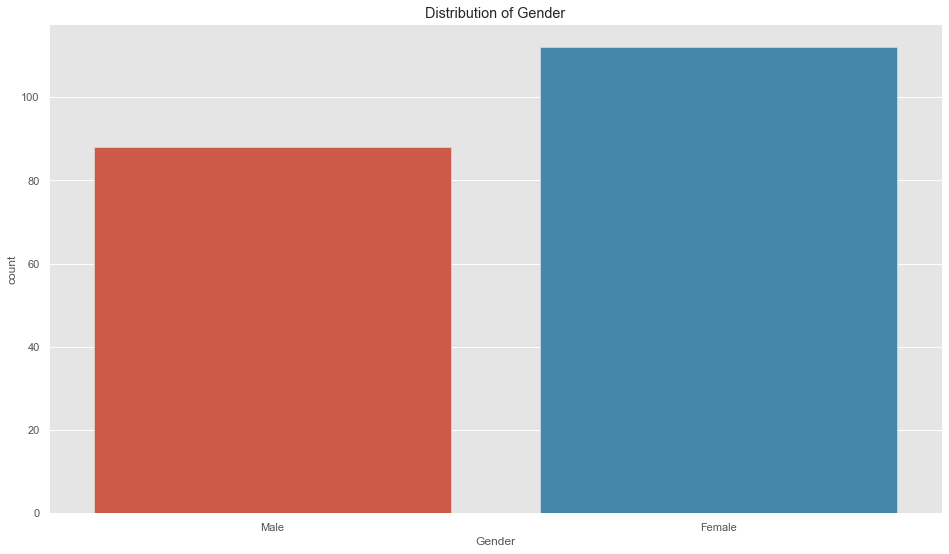

In [94]:
sns.countplot(x='Gender', data=df_customer_data);
plt.title('Distribution of Gender');

There are more female customers than male. As expected when it comes to shopping!!! :)

Encode gender

In [95]:
#le = LabelEncoder() 
#df_customer_data['Gender']= le.fit_transform(df_customer_data['Gender']) 
#df_customer_data.head()

Distribution of age

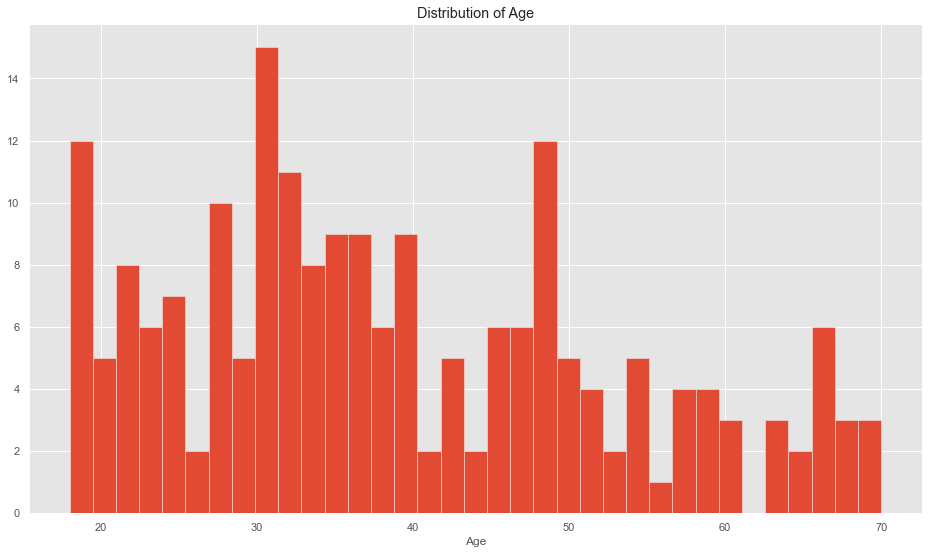

In [96]:
# Create a histogram of ages
df_customer_data.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

Most customers fall in the range of 35 and 40. As shown above (describe()), mean age is 38.

Distribution of Income

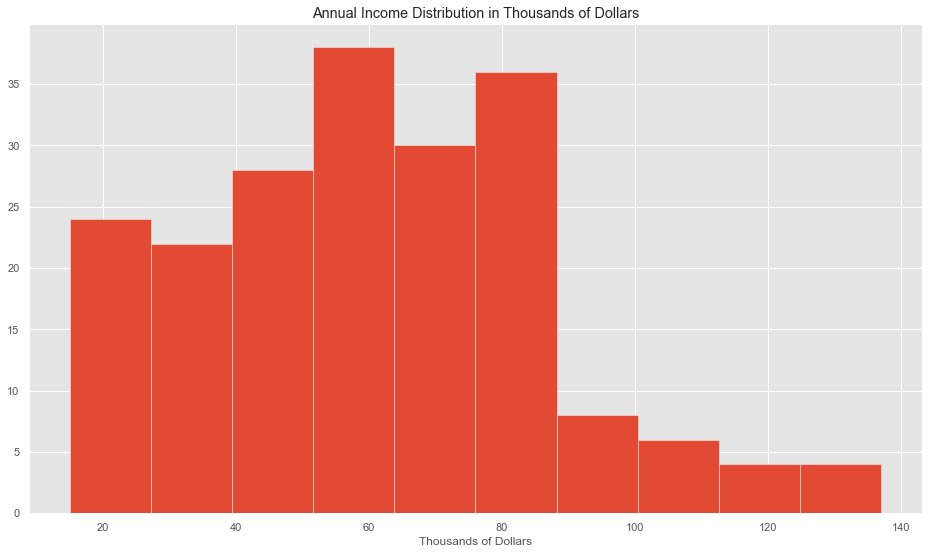

In [97]:
df_customer_data.hist('Annual Income');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

Most customers fall in the range of 60,000 and 80,000. As shown above (describe()), mean age is 38.
Can we go further down the income by gender? Does gender have any role on income level?

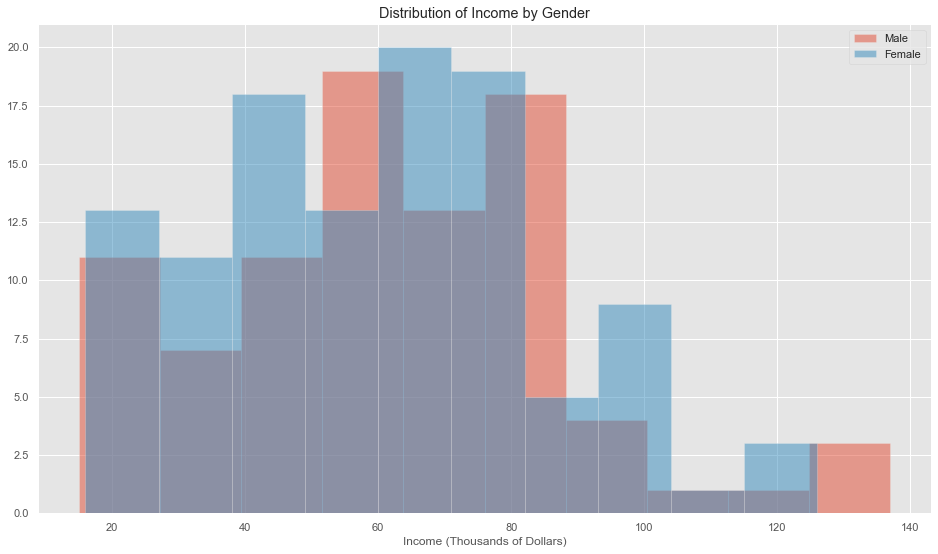

In [98]:
plt.hist('Annual Income', data=df_customer_data[df_customer_data['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income', data=df_customer_data[df_customer_data['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

Women seem to earn slightly lower in the histogram above. Let's dig deeper.

In [99]:
male_customers = df_customer_data[df_customer_data['Gender'] == 'Male']
female_customers = df_customer_data[df_customer_data['Gender'] == 'Female']

# Print the average income for men and women
print('Annual Income of male customers: $' + str(male_customers['Annual Income'].mean()))
print('Annual Income of female customers: $' + str(female_customers['Annual Income'].mean()))

Annual Income of male customers: $62.22727272727273
Annual Income of female customers: $59.25


How about the spending score by gender? Is the spending power influenced by gender?

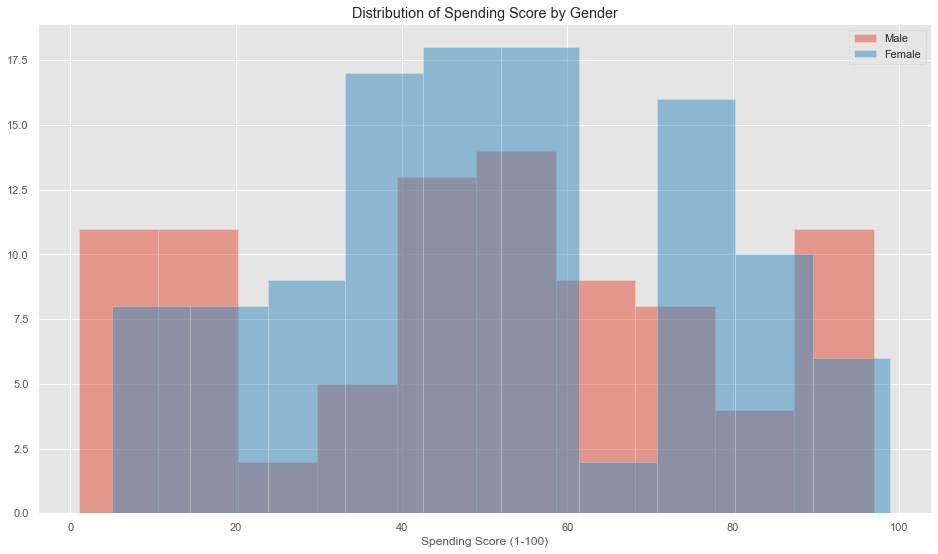

In [100]:
plt.hist('Spending Score', data=df_customer_data[df_customer_data['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Spending Score', data=df_customer_data[df_customer_data['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Spending Score by Gender');
plt.xlabel('Spending Score (1-100)');
plt.legend();

Well, women seem (or must?) to splurge more money in shopping although in reality, they earn less than men do.  
Let's find out how much exactly the spending score for both genders are.

In [101]:
# Print the spending score for men and women
print('Spending Score of male customers: ' + str(male_customers['Spending Score'].mean()))
print('Spending Score of female customers: ' + str(female_customers['Spending Score'].mean()))

Spending Score of male customers: 48.51136363636363
Spending Score of female customers: 51.526785714285715


Lastly, let's have a look at the Income against Spending Score

Text(0.5, 0, 'Income / spend')

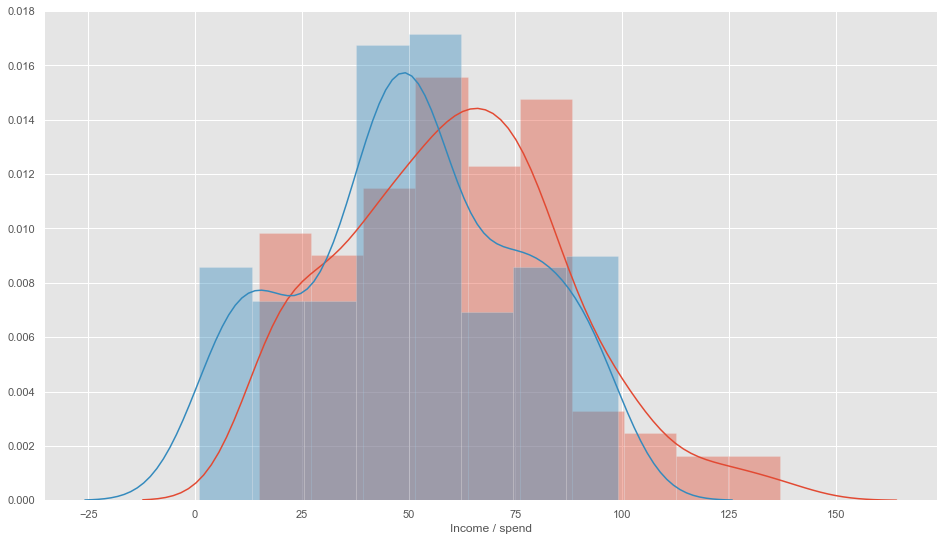

In [102]:
plot_income = sns.distplot(df_customer_data['Annual Income'])
plot_spend = sns.distplot(df_customer_data['Spending Score'])
plt.xlabel('Income / spend')

Use elbow method to determine most optimum number of clusters (Annual Income against Spending Score)

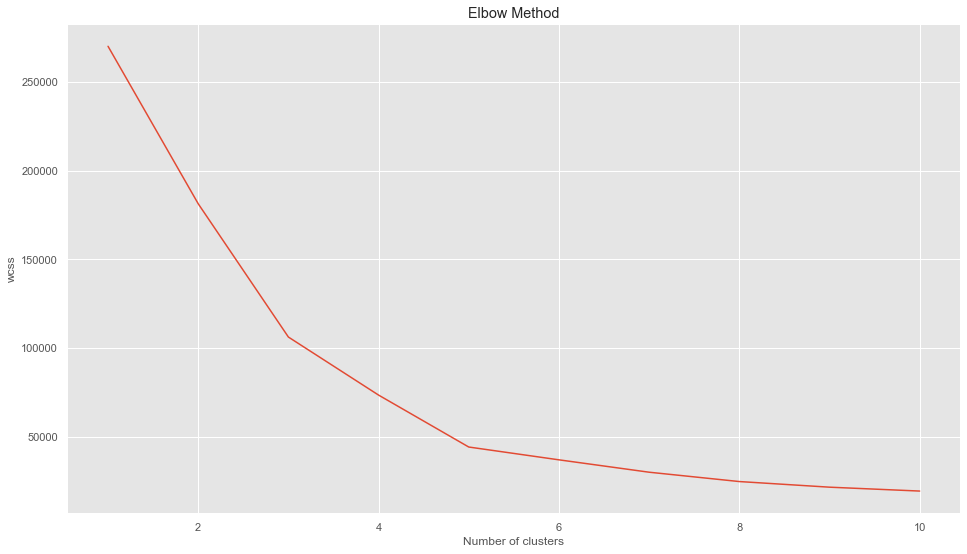

In [103]:
X = df_customer_data.iloc[:, [3, 4]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

5 is the most optimum number of clusters.
Plotting the clusters now

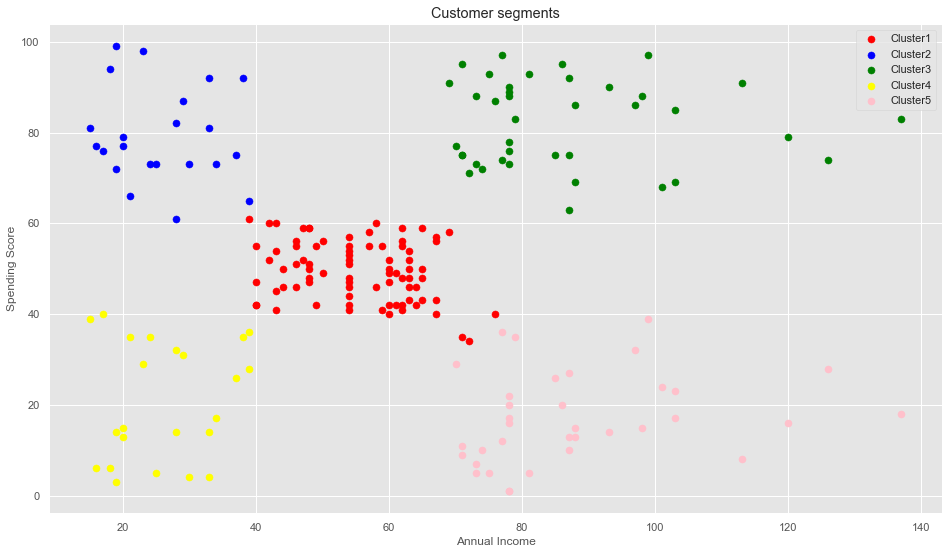

In [104]:
km5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(X)
#Visualizing the clusters for k=5

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='red',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='yellow',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='pink',label='Cluster5')
plt.title('Customer segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

__<font color=red>Cluster 1: Average Income, Average Spending</font>  
<font color=blue>Cluster 2: Low Income, High Spending</font>  
<font color=green>Cluster 3: High Income, High Spending</font>  
<font color=yellow>Cluster 4: Low Income, Low Spending</font>  
<font color=pink>Cluster 5: High Income, Low Spending</font>__

Let's identify customers in cluster 3, since they are the most promising.

In [105]:
cluster3_customers_segment1 = df_customer_data[(df_customer_data['Annual Income'] > 70) & (df_customer_data['Annual Income'] <= 100) & (df_customer_data['Spending Score'] > 70)]
cluster3_customers_segment1

,CustomerID,Gender,Age,Annual Income,Spending Score
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93
143,144,Female,32,76,87
145,146,Male,28,77,97


Use elbow method to determine most optimum number of clusters (Age against Spending Score)

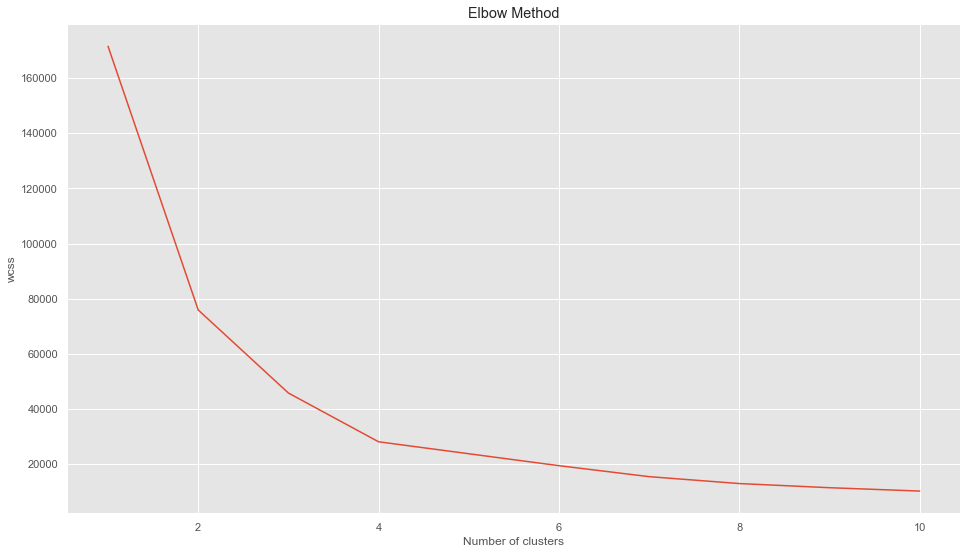

In [106]:
X = df_customer_data.iloc[:, [2, 4]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

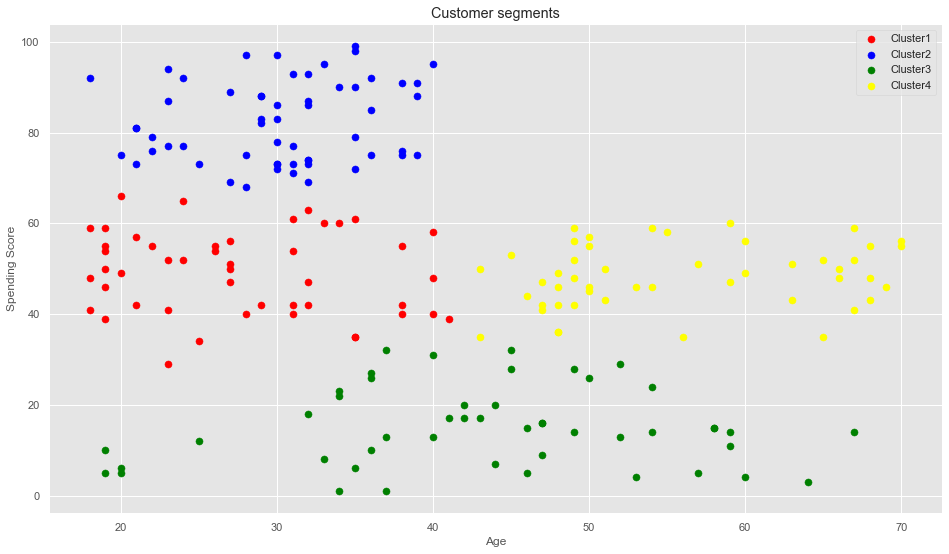

In [107]:
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters for k=4

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='red',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='yellow',label='Cluster4')
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

__<font color=red>Cluster 1: Age: 20 - 35, Average Spending</font>  
<font color=blue>Cluster 2: Age: 20 - 40, High Spending</font>  
<font color=green>Cluster 3: Age: 40 - 55, Low Spending</font>  
<font color=yellow>Cluster 4: Age: 45 - 70, Average Spending</font>__

Let's identify customers in cluster 2, since they are the most promising.

In [108]:
cluster2_customers_segment2 = df_customer_data[(df_customer_data['Age'] >= 20) & (df_customer_data['Age'] <= 40) & (df_customer_data['Spending Score'] > 70)]
cluster2_customers_segment2

,CustomerID,Gender,Age,Annual Income,Spending Score
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
19,20,Female,35,23,98
21,22,Male,25,24,73


## Results, Discussion and Conclusion

Our analysis shows that multiple factors influence the spending of customers. We can't generally say customers with higher annual income will definitely spend more casually as it turns out that female customers, who earn lower annual income than the male customers, have higher spending score.

West Mall however should focus more on potential customers as shown in the clusters above.
In the first segmentation, marketing team and management should focus on customers in __cluster 3__, who earn handsomely and are willing to spend their money. __These customers earn between 70,000 - 100,000 per annum and score above 70 in their spending (refer to cluster3_customers_segment1)__.

In the second segmentation, marketing team and management should focus on customers in __cluster 2__, who are at their prime and productive age, and high in spending score. __These customers age between 20 and 40 and score above 70 in their spending (refer to cluster2_customers_segment2)__.

Upon identifying potential customers, it will be very helpful further analyze potential customers by identifying the items they have purchased so far. Thus, marketing team would be able to target them more precisely by sending them promo brochures or email messages on the items the customers are likely to shop.